데이터 집단의 의미

: k-댐 유입량에 영향을 미치는 지역 A, B, C, D

: 이 다섯 지역으로부터 k 댐까지의 구간거리, 시간을 달리 설정하여 전공분야(토목공학)에서 의미 있다고 생각하는 6개의 독립변수 집합

In [1]:
import numpy as np
import pandas as pd


root = '/content/drive/MyDrive/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_데이터_210803'


train = pd.read_csv(root+'/01_제공데이터/train.csv', encoding ='cp949')
submit = pd.read_csv(root+'/02_평가데이터/submit.csv', encoding ='cp949')

In [2]:
train.shape

(3052, 48)

In [3]:
submit

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,NaN
2,2.0,26.0,2018.0,7.0,1.0,7.0,NaN
3,3.0,26.0,2018.0,7.0,1.0,8.0,NaN
4,4.0,26.0,2018.0,7.0,1.0,9.0,NaN
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,NaN
157,157.0,26.0,2018.0,7.0,7.0,18.0,NaN
158,158.0,26.0,2018.0,7.0,7.0,19.0,NaN
159,159.0,26.0,2018.0,7.0,7.0,20.0,NaN


In [4]:
train.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '1_유역평균강수(mm)', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)(m)', '1_수위(D지역)(m)',
                '2_유역평균강수(mm)', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)(m)', '2_수위(D지역)(m)',
                '3_유역평균강수(mm)', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)(m)', '3_수위(D지역)(m)',
                '4_유역평균강수(mm)', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)(m)', '4_수위(D지역)(m)',
                '5_유역평균강수(mm)', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)(m)', '5_수위(D지역)(m)',
                '6_유역평균강수(mm)', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)(m)', '6_수위(D지역)(m)']

train.drop(0, axis=0, inplace=True)
submit.drop(0, axis=0, inplace=True)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   홍수사상번호        3051 non-null   float64
 1   연             3051 non-null   float64
 2   월             3051 non-null   float64
 3   일             3051 non-null   float64
 4   시간            3051 non-null   float64
 5   유입량           2891 non-null   float64
 6   1_유역평균강수(mm)  3051 non-null   object 
 7   1_강우(A지역)     3051 non-null   object 
 8   1_강우(B지역)     3051 non-null   object 
 9   1_강우(C지역)     3051 non-null   object 
 10  1_강우(D지역)     3051 non-null   object 
 11  1_수위(E지역)(m)  3051 non-null   object 
 12  1_수위(D지역)(m)  3051 non-null   object 
 13  2_유역평균강수(mm)  3051 non-null   object 
 14  2_강우(A지역)     3051 non-null   object 
 15  2_강우(B지역)     3051 non-null   object 
 16  2_강우(C지역)     3051 non-null   object 
 17  2_강우(D지역)     3051 non-null   object 
 18  2_수위(E지역)(m)  3051 non-null 

In [6]:
obj_col = [ '1_유역평균강수(mm)', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)(m)', '1_수위(D지역)(m)',
                '2_유역평균강수(mm)', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)(m)', '2_수위(D지역)(m)',
                '3_유역평균강수(mm)', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)(m)', '3_수위(D지역)(m)',
                '4_유역평균강수(mm)', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)(m)', '4_수위(D지역)(m)',
                '5_유역평균강수(mm)', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)(m)', '5_수위(D지역)(m)',
                '6_유역평균강수(mm)', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)(m)', '6_수위(D지역)(m)']
for x in obj_col:
  train[x] = train[x].astype(float)

date_col = ['연', '월', '일']

for y in date_col:
  train[y] = train[y].astype(int)
  train[y] = train[y].astype(str)
  
train['홍수사상번호'] = train['홍수사상번호'].astype(int)
train['시간'] = train['시간'].astype(int)

In [ ]:

train.isnull().sum()
#유입량 NaN값 160개

홍수사상번호            0
연                 0
월                 0
일                 0
시간                0
유입량             160
1_유역평균강수(mm)      0
1_강우(A지역)         0
1_강우(B지역)         0
1_강우(C지역)         0
1_강우(D지역)         0
1_수위(E지역)(m)      0
1_수위(D지역)(m)      0
2_유역평균강수(mm)      0
2_강우(A지역)         0
2_강우(B지역)         0
2_강우(C지역)         0
2_강우(D지역)         0
2_수위(E지역)(m)      0
2_수위(D지역)(m)      0
3_유역평균강수(mm)      0
3_강우(A지역)         0
3_강우(B지역)         0
3_강우(C지역)         0
3_강우(D지역)         0
3_수위(E지역)(m)      0
3_수위(D지역)(m)      0
4_유역평균강수(mm)      0
4_강우(A지역)         0
4_강우(B지역)         0
4_강우(C지역)         0
4_강우(D지역)         0
4_수위(E지역)(m)      0
4_수위(D지역)(m)      0
5_유역평균강수(mm)      0
5_강우(A지역)         0
5_강우(B지역)         0
5_강우(C지역)         0
5_강우(D지역)         0
5_수위(E지역)(m)      0
5_수위(D지역)(m)      0
6_유역평균강수(mm)      0
6_강우(A지역)         0
6_강우(B지역)         0
6_강우(C지역)         0
6_강우(D지역)         0
6_수위(E지역)(m)      0
6_수위(D지역)(m)      0
dtype: int64

In [7]:
test = train[train.유입량.isnull()]
train = train.dropna(axis=0)

In [ ]:
train.월.unique() #6,7,8,9
train.연.unique() # 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017, 2018

train[train.유입량.isnull()].월.unique() #7
train[train.유입량.isnull()].연.unique() #2018

array([], dtype=object)

In [ ]:
train

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수(mm),1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역)(m),1_수위(D지역)(m),2_유역평균강수(mm),2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역)(m),2_수위(D지역)(m),3_유역평균강수(mm),3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역)(m),3_수위(D지역)(m),4_유역평균강수(mm),4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역)(m),4_수위(D지역)(m),5_유역평균강수(mm),5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역)(m),5_수위(D지역)(m),6_유역평균강수(mm),6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역)(m),6_수위(D지역)(m)
1,1,2006,7,10,8,189.1,6.4,7.0,7.0,7.0,8.0,2.5,122.6,6.3,7.0,7.0,7.0,8.0,2.5,122.5,6.3,7.0,7.0,7.0,8.0,2.5,122.6,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.6
2,1,2006,7,10,9,217.0,6.3,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.7,7.3,7.0,8.0,10.0,10.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.6
3,1,2006,7,10,10,251.4,6.4,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,8.0,8.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.7,8.2,7.0,9.0,10.0,11.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.6
4,1,2006,7,10,11,302.8,7.3,7.0,10.0,7.0,8.0,2.5,122.6,8.2,7.0,10.0,8.0,8.0,2.5,122.6,8.2,7.0,10.0,10.0,10.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.7,11.3,9.0,10.0,15.0,14.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.6
5,1,2006,7,10,12,384.8,8.2,7.0,12.0,8.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,11.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25,2017,7,18,18,513.4,22.8,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,4.1,6.0,0.0,1.0,1.0,3.0,137.1,3.3,6.0,0.0,1.0,1.0,3.0,137.1,1.7,6.0,0.0,1.0,1.0,3.0,137.1
2888,25,2017,7,18,19,502.8,8.3,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,3.4,2.0,0.0,1.0,1.0,3.0,137.1,2.8,2.0,0.0,1.0,1.0,3.0,137.1,1.7,2.0,0.0,1.0,1.0,3.0,137.1
2889,25,2017,7,18,20,492.0,4.1,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.1,2.1,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2
2890,25,2017,7,18,21,481.1,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,2.8,1.0,0.0,1.0,1.0,3.0,137.1,1.9,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0

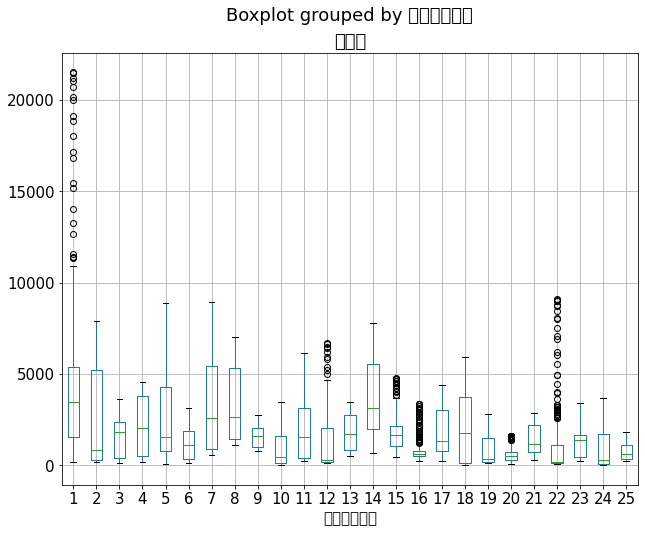

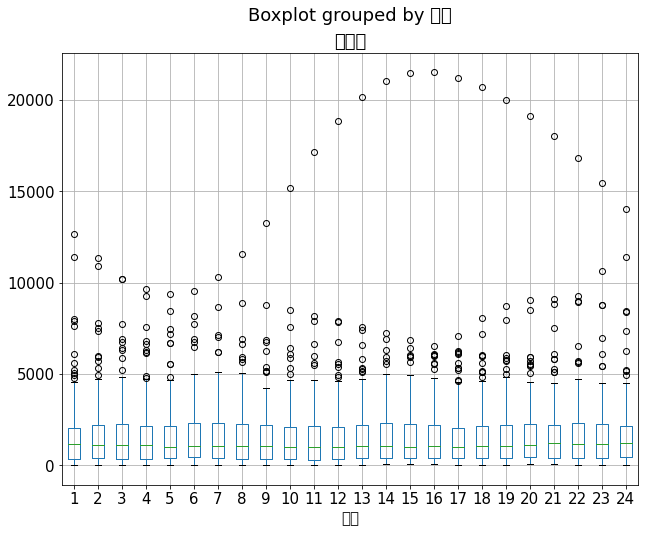

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
font_path = '/content/drive/MyDrive/MALGUN.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#홍수사상번호별 유입량 이상치 
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 15
train.boxplot(column=['유입량'], by='홍수사상번호')

#시간대별 유입량 이상치

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 15
train.boxplot(column=['유입량'], by='시간')

In [8]:
#이상치

def outlier_iqr(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3-q1
  lower = q1- (iqr*1.5)
  upper = q3 + (iqr*1.5)

  return np.where((data > upper) | (data < lower))

In [9]:
outlier_1 = outlier_iqr(train.loc[train['홍수사상번호']==1].유입량)[0]
outlier_12 = outlier_iqr(train.loc[train['홍수사상번호']==12].유입량)[0]
outlier_15 = outlier_iqr(train.loc[train['홍수사상번호']==15].유입량)[0]
outlier_16 = outlier_iqr(train.loc[train['홍수사상번호']==16].유입량)[0]
outlier_20 = outlier_iqr(train.loc[train['홍수사상번호']==20].유입량)[0]
outlier_22 = outlier_iqr(train.loc[train['홍수사상번호']==22].유입량)[0]

In [ ]:
# outlier_time = [i for i in range(1,24)]
# outlier_time_index = []

# for i in outlier_time:
#   outlier = outlier_iqr(train.loc[train['시간'] == i].유입량)[0]
#   print(outlier)
#   outlier_time_index.append(outlier)




In [ ]:
# for i in range(len(outlier_time_index)):
#   outlier_time_index[i] = outlier_time_index[i].tolist()

# outlier_time_index = np.concatenate(outlier_time_index).tolist()


In [10]:
outlier_index = np.concatenate([outlier_1, outlier_12, outlier_15, outlier_16, outlier_20, outlier_22], axis=0)
# outlier_index.reshape()
print(len(outlier_index))

139


In [ ]:
# outlier_index = outlier_index.tolist()

# outlier_index = outlier_index + outlier_time_index

In [11]:
outlier_index = set(outlier_index)

In [12]:
for i in outlier_index:
  train = train.drop(index=i, axis = 0)

train

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수(mm),1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역)(m),1_수위(D지역)(m),2_유역평균강수(mm),2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역)(m),2_수위(D지역)(m),3_유역평균강수(mm),3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역)(m),3_수위(D지역)(m),4_유역평균강수(mm),4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역)(m),4_수위(D지역)(m),5_유역평균강수(mm),5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역)(m),5_수위(D지역)(m),6_유역평균강수(mm),6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역)(m),6_수위(D지역)(m)
1,1,2006,7,10,8,189.1,6.4,7.0,7.0,7.0,8.0,2.5,122.6,6.3,7.0,7.0,7.0,8.0,2.5,122.5,6.3,7.0,7.0,7.0,8.0,2.5,122.6,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.6
2,1,2006,7,10,9,217.0,6.3,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.7,7.3,7.0,8.0,10.0,10.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.6
3,1,2006,7,10,10,251.4,6.4,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,8.0,8.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.7,8.2,7.0,9.0,10.0,11.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.6
4,1,2006,7,10,11,302.8,7.3,7.0,10.0,7.0,8.0,2.5,122.6,8.2,7.0,10.0,8.0,8.0,2.5,122.6,8.2,7.0,10.0,10.0,10.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.7,11.3,9.0,10.0,15.0,14.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.6
5,1,2006,7,10,12,384.8,8.2,7.0,12.0,8.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,11.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25,2017,7,18,18,513.4,22.8,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,4.1,6.0,0.0,1.0,1.0,3.0,137.1,3.3,6.0,0.0,1.0,1.0,3.0,137.1,1.7,6.0,0.0,1.0,1.0,3.0,137.1
2888,25,2017,7,18,19,502.8,8.3,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,3.4,2.0,0.0,1.0,1.0,3.0,137.1,2.8,2.0,0.0,1.0,1.0,3.0,137.1,1.7,2.0,0.0,1.0,1.0,3.0,137.1
2889,25,2017,7,18,20,492.0,4.1,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.1,2.1,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2
2890,25,2017,7,18,21,481.1,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,2.8,1.0,0.0,1.0,1.0,3.0,137.1,1.9,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2


In [13]:
train = train.drop(['연', '월', '일', '시간'], axis=1)

In [ ]:
train

,홍수사상번호,유입량,1_유역평균강수(mm),1_강우(A지역),1_강우(B지역),1_강우(C지역),1_강우(D지역),1_수위(E지역)(m),1_수위(D지역)(m),2_유역평균강수(mm),2_강우(A지역),2_강우(B지역),2_강우(C지역),2_강우(D지역),2_수위(E지역)(m),2_수위(D지역)(m),3_유역평균강수(mm),3_강우(A지역),3_강우(B지역),3_강우(C지역),3_강우(D지역),3_수위(E지역)(m),3_수위(D지역)(m),4_유역평균강수(mm),4_강우(A지역),4_강우(B지역),4_강우(C지역),4_강우(D지역),4_수위(E지역)(m),4_수위(D지역)(m),5_유역평균강수(mm),5_강우(A지역),5_강우(B지역),5_강우(C지역),5_강우(D지역),5_수위(E지역)(m),5_수위(D지역)(m),6_유역평균강수(mm),6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역)(m),6_수위(D지역)(m)
1,1,189.1,6.4,7.0,7.0,7.0,8.0,2.5,122.6,6.3,7.0,7.0,7.0,8.0,2.5,122.5,6.3,7.0,7.0,7.0,8.0,2.5,122.6,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.7,6.4,7.0,7.0,8.0,8.0,2.5,122.6
2,1,217.0,6.3,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,6.4,7.0,8.0,7.0,8.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.7,7.3,7.0,8.0,10.0,10.0,2.5,122.6,7.3,7.0,8.0,10.0,10.0,2.5,122.6
3,1,251.4,6.4,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,7.0,8.0,2.5,122.6,7.3,7.0,9.0,8.0,8.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.7,8.2,7.0,9.0,10.0,11.0,2.5,122.6,8.2,7.0,9.0,10.0,11.0,2.5,122.6
4,1,302.8,7.3,7.0,10.0,7.0,8.0,2.5,122.6,8.2,7.0,10.0,8.0,8.0,2.5,122.6,8.2,7.0,10.0,10.0,10.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.7,11.3,9.0,10.0,15.0,14.0,2.5,122.6,11.3,9.0,10.0,15.0,14.0,2.5,122.6
5,1,384.8,8.2,7.0,12.0,8.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,10.0,2.5,122.6,11.3,9.0,12.0,10.0,11.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6,14.4,12.0,12.0,18.0,16.0,2.5,122.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,25,513.4,22.8,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,8.3,6.0,0.0,1.0,1.0,3.0,137.2,4.1,6.0,0.0,1.0,1.0,3.0,137.1,3.3,6.0,0.0,1.0,1.0,3.0,137.1,1.7,6.0,0.0,1.0,1.0,3.0,137.1
2888,25,502.8,8.3,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,4.1,2.0,0.0,1.0,1.0,3.0,137.2,3.4,2.0,0.0,1.0,1.0,3.0,137.1,2.8,2.0,0.0,1.0,1.0,3.0,137.1,1.7,2.0,0.0,1.0,1.0,3.0,137.1
2889,25,492.0,4.1,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.1,2.1,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2
2890,25,481.1,3.4,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,3.3,1.0,0.0,1.0,1.0,3.0,137.2,2.8,1.0,0.0,1.0,1.0,3.0,137.1,1.9,1.0,0.0,1.0,1.0,3.0,137.1,1.7,1.0,0.0,1.0,1.0,3.0,137.2


In [18]:
train.loc[train['홍수사상번호']==25].shape

(103, 44)

In [27]:
from sklearn.model_selection import train_test_split
x_train = train.drop(['유입량'], axis=1)
y_train = train['유입량']
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train, test_size=0.0368)

In [28]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape 

((2681, 43), (2681,), (103, 43), (103,))

In [ ]:
from sklearn.model_selection import KFold
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb

In [ ]:
model_gb = GradientBoostingRegressor(n_estimators=1000, 
                                     learning_rate = 0.1, max_depth = 4, 
                                     min_samples_split=10, loss='huber')

model_rf = RandomForestRegressor(n_estimators=3000, 
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.

# dt = DecisionTreeRegressor()
# tree_model = dt.fit(x_train, y_train)
# predict = tree_model.predict(x_val)
# print('RMSE : ', sqrt(mean_squared_error(predict, y_val)))

RMSE :  409.37423740934196


In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_dt = BaggingRegressor(base_estimator = dt, n_estimators=100, verbose=1)

tree_model2 = bagging_dt.fit(x_train, y_train)
predict2 = tree_model2.predict(x_val)
print('RMSE : ', sqrt(mean_squared_error(predict2, y_val)))

#sampling 10 : 280.12
#sampling 20 : 264.98
#sampling 100: 233
#sampling 500 : 362.09

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE :  362.0983664937924


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
# import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from math import sqrt

# sm_x_train = sm.add_constant(x_train, has_constant='add')
# sm_model = sm.OLS(y_train, sm_x_train)
# fitted_sm_model = sm_model.fit()
# fitted_sm_model.summary()

# sm_x_val = sm.add_constant(x_val, has_constant='add')
# sm_model_predict = fitted_sm_model.predict(sm_x_val)

# sqrt(mean_squared_error(sm_model_predict, y_val))

In [ ]:
# bagging_predict_result=[]

# for _ in range(10):
#   data_index = [data_index for data_index in range(x_train.shape[0])]
#   random_data_index = np.random.choice(data_index, x_train.shape[0])
#   print(len(set(random_data_index)))

#   sm_x_train = x_train.iloc[random_data_index,]
#   sm_y_train = y_train.iloc[random_data_index,]
#   sm_x_train = sm.add_constant(sm_x_train, has_constant="add")
#   sm_model = sm.OLS(sm_y_train,sm_x_train)
#   fitted_sm_model = sm_model.fit()
    
#   # 각 데이터셋의 예측결과
#   pred = fitted_sm_model.predict(sm_x_val)
#   bagging_predict_result.append(pred)
#   print(sqrt(mean_squared_error(pred,y_val)))

In [ ]:
# !pip install pycaret

In [ ]:
# from pycaret.regression import *

# reg = setup(train, target='유입량', train_size=0.9)

In [ ]:
# best_model = compare_models(sort='RMSE')

In [ ]:
# et = create_model('et', cross_validation=False)
# rf = create_model('rf', cross_validation=False)
# lgb = create_model('lightgbm', cross_validation=False)

In [ ]:
# tuned_et = tune_model(et, optimize='RMSE', n_iter=20)
# tuned_rf = tune_model(rf, optimize='RMSE', n_iter=20)
# tuned_lgb = tune_model(lgb, optimize='RMSE', n_iter=20)

In [ ]:
# #모델 블렌딩 ==> 튜닝 끝난 모델 3개를 앙상블

# blender_specific = blend_models(estimator_list = [tuned_et, tuned_rf, tuned_lgb], optimize='RMSE')

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_scaled_train = scaler.transform(x_train)

In [ ]:
# train_scaled_df = pd.DataFrame(data = train_scaled, columns = train.columns)

In [ ]:
# train_scaled_df

In [ ]:
# train = train.drop(['2_수위(E지역)(m)', '3_수위(E지역)(m)','3_수위(E지역)(m)',
#                             '4_수위(E지역)(m)','5_수위(E지역)(m)', '6_수위(E지역)(m)'], axis=1)

In [ ]:
# train['1_강우평균'] = (train['1_강우(A지역)'] + train['1_강우(B지역)'] + train['1_강우(C지역)'] + train['1_강우(D지역)'])/4
# train['2_강우평균'] = (train['2_강우(A지역)'] + train['2_강우(B지역)'] + train['2_강우(C지역)'] + train['2_강우(D지역)'])/4
# train['3_강우평균'] = (train['3_강우(A지역)'] + train['3_강우(B지역)'] + train['3_강우(C지역)'] + train['3_강우(D지역)'])/4
# train['4_강우평균'] = (train['4_강우(A지역)'] + train['4_강우(B지역)'] + train['4_강우(C지역)'] + train['4_강우(D지역)'])/4
# train['5_강우평균'] = (train['5_강우(A지역)'] + train['5_강우(B지역)'] + train['5_강우(C지역)'] + train['5_강우(D지역)'])/4
# train['6_강우평균'] = (train['6_강우(A지역)'] + train['6_강우(B지역)'] + train['6_강우(C지역)'] + train['6_강우(D지역)'])/4


In [ ]:
# train = train.drop(['1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)',
#                           '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)',
#                           '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)',
#                           '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)',
#                           '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)',
#                           '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)'], axis=1)

In [ ]:
# train['년_월'] = train['연'] + '/' + train['월']

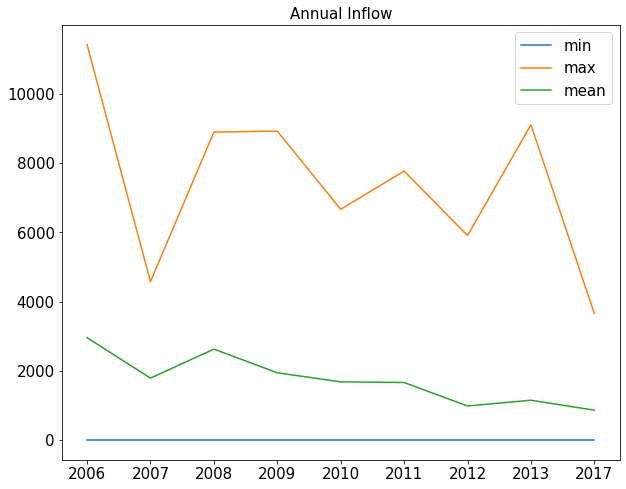

In [ ]:
# 연 별 유입량 시각화

df_year_min = train['1_강우(A지역)'].groupby(train['연']).min()
df_year_max = train['유입량'].groupby(train['연']).max()
df_year_mean = train['유입량'].groupby(train['연']).mean()


# fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_year_min, label='min')
plt.plot(df_year_max, label='max')
plt.plot(df_year_mean, label='mean')
plt.title('Annual Inflow', fontsize=15)
plt.legend(loc='best')


# 홍수 7 -> 8 -> 6 -> 9 순으로 많이 발생  ** 출처 : 문화컨텐츠닷컴 

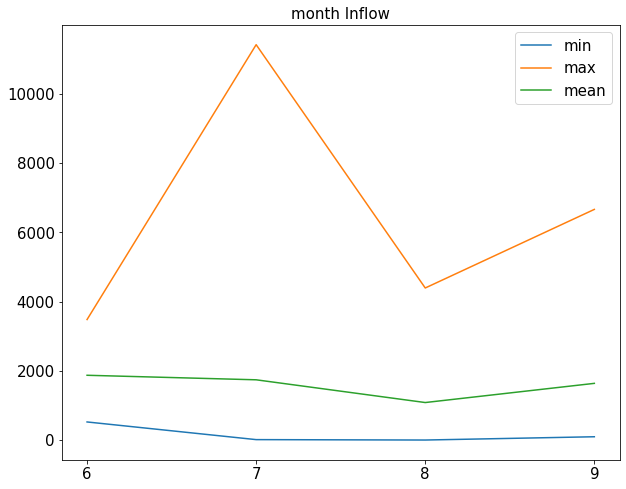

In [ ]:
# 연 별 유입량 시각화

df_year_min = train['유입량'].groupby(train['월']).min()
df_year_max = train['유입량'].groupby(train['월']).max()
df_year_mean = train['유입량'].groupby(train['월']).mean()


# fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_year_min, label='min')
plt.plot(df_year_max, label='max')
plt.plot(df_year_mean, label='mean')
plt.title('month Inflow', fontsize=15)
plt.legend(loc='best')


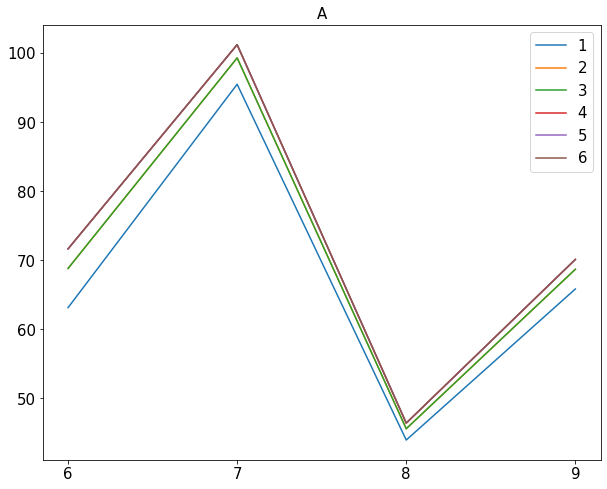

In [ ]:

#월 별 유입량 시각화

df_month_1 = train['1_강우(A지역)'].groupby(train['월']).mean()
df_month_2 = train['2_강우(A지역)'].groupby(train['월']).mean()
df_month_3= train['3_강우(A지역)'].groupby(train['월']).mean()
df_month_4 = train['4_강우(A지역)'].groupby(train['월']).mean()
df_month_5 = train['5_강우(A지역)'].groupby(train['월']).mean()
df_month_6 = train['6_강우(A지역)'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_1, label='1')
plt.plot(df_month_2, label='2')
plt.plot(df_month_3, label='3')
plt.plot(df_month_4, label='4')
plt.plot(df_month_5, label='5')
plt.plot(df_month_6, label='6')
plt.title('A', fontsize=15)
plt.legend(loc='best')

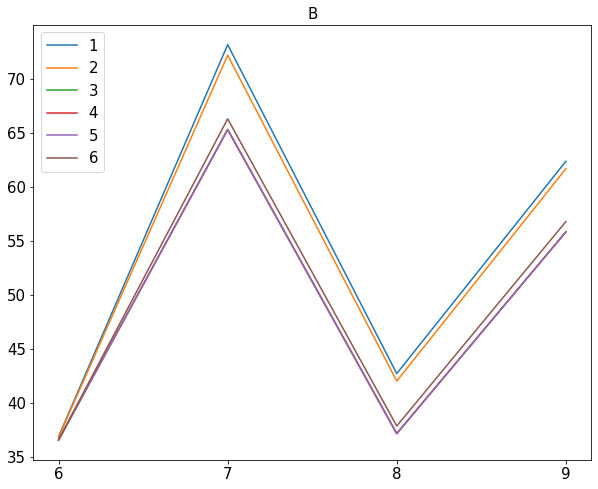

In [ ]:

df_month_1 = train['1_강우(B지역)'].groupby(train['월']).mean()
df_month_2 = train['2_강우(B지역)'].groupby(train['월']).mean()
df_month_3= train['3_강우(B지역)'].groupby(train['월']).mean()
df_month_4 = train['4_강우(B지역)'].groupby(train['월']).mean()
df_month_5 = train['5_강우(B지역)'].groupby(train['월']).mean()
df_month_6 = train['6_강우(B지역)'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_1, label='1')
plt.plot(df_month_2, label='2')
plt.plot(df_month_3, label='3')
plt.plot(df_month_4, label='4')
plt.plot(df_month_5, label='5')
plt.plot(df_month_6, label='6')
plt.title('B', fontsize=15)
plt.legend(loc='best')

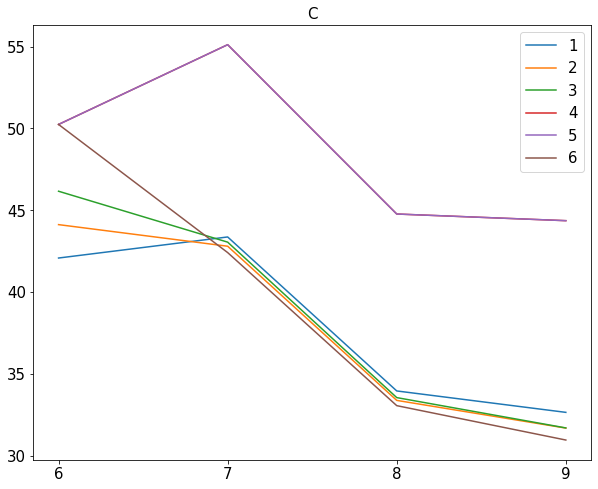

In [ ]:

df_month_1 = train['1_강우(C지역)'].groupby(train['월']).mean()
df_month_2 = train['2_강우(C지역)'].groupby(train['월']).mean()
df_month_3= train['3_강우(C지역)'].groupby(train['월']).mean()
df_month_4 = train['4_강우(C지역)'].groupby(train['월']).mean()
df_month_5 = train['5_강우(C지역)'].groupby(train['월']).mean()
df_month_6 = train['6_강우(C지역)'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_1, label='1')
plt.plot(df_month_2, label='2')
plt.plot(df_month_3, label='3')
plt.plot(df_month_4, label='4')
plt.plot(df_month_5, label='5')
plt.plot(df_month_6, label='6')
plt.title('C', fontsize=15)
plt.legend(loc='best')

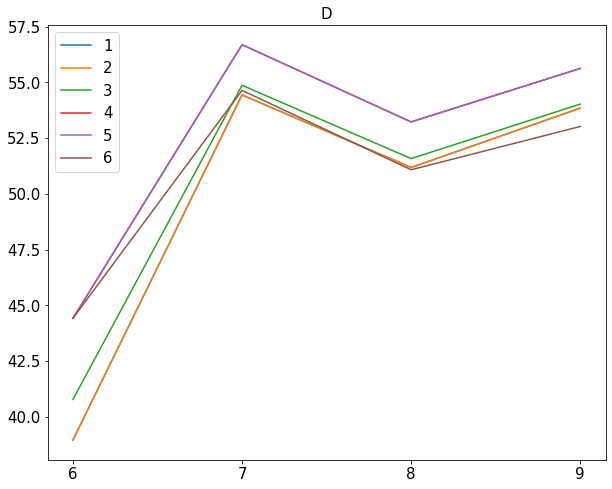

In [ ]:

df_month_1 = train['1_강우(D지역)'].groupby(train['월']).mean()
df_month_2 = train['2_강우(D지역)'].groupby(train['월']).mean()
df_month_3= train['3_강우(D지역)'].groupby(train['월']).mean()
df_month_4 = train['4_강우(D지역)'].groupby(train['월']).mean()
df_month_5 = train['5_강우(D지역)'].groupby(train['월']).mean()
df_month_6 = train['6_강우(D지역)'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_1, label='1')
plt.plot(df_month_2, label='2')
plt.plot(df_month_3, label='3')
plt.plot(df_month_4, label='4')
plt.plot(df_month_5, label='5')
plt.plot(df_month_6, label='6')
plt.title('D', fontsize=15)
plt.legend(loc='best')

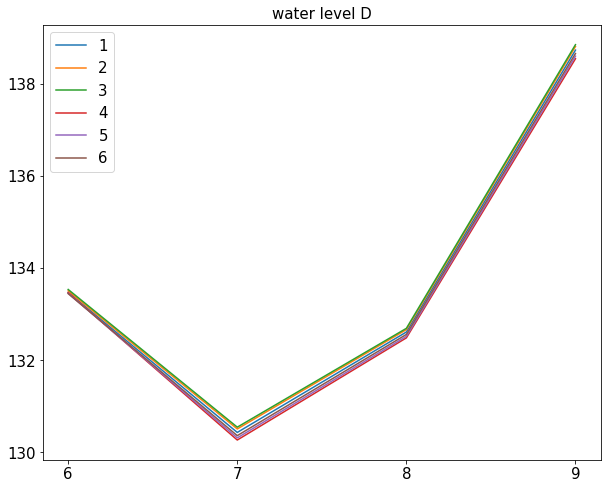

In [ ]:

df_month_1 = train['1_수위(D지역)(m)'].groupby(train['월']).mean()
df_month_2 = train['2_수위(D지역)(m)'].groupby(train['월']).mean()
df_month_3= train['3_수위(D지역)(m)'].groupby(train['월']).mean()
df_month_4 = train['4_수위(D지역)(m)'].groupby(train['월']).mean()
df_month_5 = train['5_수위(D지역)(m)'].groupby(train['월']).mean()
df_month_6 = train['6_수위(D지역)(m)'].groupby(train['월']).mean()

# fix, ax = plt.subplots(figsize=(10,6))
plt.plot(df_month_1, label='1')
plt.plot(df_month_2, label='2')
plt.plot(df_month_3, label='3')
plt.plot(df_month_4, label='4')
plt.plot(df_month_5, label='5')
plt.plot(df_month_6, label='6')
plt.title('water level D', fontsize=15)
plt.legend(loc='best')

In [ ]:
# #연, 월 별 유입량 시각화


# df_year_month_min = train['유입량'].groupby(train['년_월']).min()
# df_year_month_max = train['유입량'].groupby(train['년_월']).max()
# df_year_month_mean = train['유입량'].groupby(train['년_월']).mean()
# # fix, ax = plt.subplots(figsize=(10,6))
# plt.plot(df_year_month_min, label='min')
# plt.plot(df_year_month_max, label='max')
# plt.plot(df_year_month_mean, label='mean')
# plt.xticks(rotation=45)
# plt.title('Year+month Inflow', fontsize=15)

In [ ]:
# # 시간대별 유입량 시각화
# df_time_min = train['유입량'].groupby(train['시간']).min()
# df_time_max = train['유입량'].groupby(train['시간']).max()
# df_time_mean = train['유입량'].groupby(train['시간']).mean()
# # fix, ax = plt.subplots(figsize=(10,6))
# plt.ylim((1400,1700))
# plt.plot(df_time_min, label='min')
# plt.plot(df_time_max, label='max')
# plt.plot(df_time_mean, label='mean')
# plt.title('Time Inflow', fontsize=15)

In [ ]:
cor = train.corrwith(train['유입량'])
cor


홍수사상번호         -0.327323
시간             -0.014400
유입량             1.000000
1_유역평균강수(mm)    0.751502
1_강우(A지역)       0.667501
1_강우(B지역)       0.717761
1_강우(C지역)       0.648665
1_강우(D지역)       0.735185
1_수위(E지역)(m)    0.916641
1_수위(D지역)(m)    0.059668
2_유역평균강수(mm)    0.759677
2_강우(A지역)       0.665587
2_강우(B지역)       0.721875
2_강우(C지역)       0.662178
2_강우(D지역)       0.735185
2_수위(E지역)(m)    0.916641
2_수위(D지역)(m)    0.073744
3_유역평균강수(mm)    0.759677
3_강우(A지역)       0.665587
3_강우(B지역)       0.749816
3_강우(C지역)       0.669903
3_강우(D지역)       0.744133
3_수위(E지역)(m)    0.916641
3_수위(D지역)(m)    0.082257
4_유역평균강수(mm)    0.766106
4_강우(A지역)       0.661738
4_강우(B지역)       0.749816
4_강우(C지역)       0.638929
4_강우(D지역)       0.749816
4_수위(E지역)(m)    0.916641
4_수위(D지역)(m)    0.034112
5_유역평균강수(mm)    0.773387
5_강우(A지역)       0.661738
5_강우(B지역)       0.749816
5_강우(C지역)       0.638929
5_강우(D지역)       0.749816
5_수위(E지역)(m)    0.916641
5_수위(D지역)(m)    0.041009
6_유역평균강수(mm)    0.796543
6_강우(A지역)       0.661738


In [ ]:
y_train

1344    1171.0
1832    2023.4
1115    2515.7
316     5592.0
2624     403.4
         ...  
2716      47.7
248      220.5
87      3989.5
1828    2573.8
2267     728.5
Name: 유입량, Length: 2505, dtype: float64

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param = {
    'learning_rate':[0.01, 0.05 ,0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100,150,200,300],
    'max_depth' : [3, 5, 7,9, 10],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.05, 0.1, 0.5],
    'reg_lambda' : [0.001, 0.01, 0.05, 0.1]
}
model = xgb.XGBRegressor(tree_method='gpu_hist')

xgb_reg = RandomizedSearchCV(estimator = model, param_distributions = param,
                              n_iter = 10, scoring = 'neg_mean_absolute_error',
                              cv = 5)

xgb_search = xgb_reg.fit(x_train, y_train)
best_param = xgb_search.best_params_
best_param

[13:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.05,
 'reg_lambda': 0.001}

In [17]:
import math

In [ ]:
# #feature 평균값
# mean = train_scaled_df.mean()

# #feature들의 분산값
# var = train_scaled_df.var()

In [ ]:
# from sklearn.model_selection import ShuffleSplit 
# #하나의 데이터만을 테스트 데이터로 사용
# #데이터가 적을 때 데이터 낭비 막는 방법
# # + KFold

# kwargs={'learning_rate': 0.15,
#  'max_depth': 7,
#  'min_child_weight': 5,
#  'n_estimators': 150,
#  'reg_alpha': 0.1,
#  'reg_lambda': 0.1}
# model = xgb.XGBRegressor(tree_method='gpu_hist')
# model.set_params(**kwargs) 
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# # evaluate model
# scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# scores = abs(scores)
# print('Mean RMSE: %.3f (%.3f)' % (math.sqrt(scores.mean()), scores.std()))

In [ ]:
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
kwargs={'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.05,
 'reg_lambda': 0.001}

model = xgb.XGBRegressor(tree_method='gpu_hist')
model.set_params(**kwargs)
model.fit(x_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model,x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = abs(scores)
print('Mean RMSE: %.3f (%.3f)' % (math.sqrt(scores.mean()), scores.std()))

#시간 이상치 제거했을 때 0.15정도 높게 나옴 10.6정도?
#집단별 지역 평균 피처 만듦  10.78

[10:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.5, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
y_pred = model.predict(x_val)
print(sqrt(mean_squared_error(y_pred, y_val)))

273.8260084906371
